# Beispiel zur 2. Vorlesung: Bestimmung des flachen Ausgangs des linearisierten Modells eines verschieblichen Pendels
## Variante über Steuerbarkeitsmatrix

Unter Verwendung des Paketes SymPy

Getested unter Python 3.11 und SymPy 1.12

**Achtung:** Die Rechnungen in diesem Notebook können etwas Zeit in Anspruch nehmen!

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/flavert-nbviewer-content

**Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!**

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2023 - 2024 Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

In [1]:
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)

## Definition der Symbole

In [2]:
M = sp.Symbol('M')
m = sp.Symbol('m')
b = sp.Symbol('b')
l = sp.Symbol('l')
J = sp.Symbol('J')
g = sp.Symbol('g')
t = sp.Symbol('t')

## Definition der Funktionen

(Damit SymPy bei Ableitungen weiß, wie vorzugehen ist)

In [3]:
x1 = sp.Function('x_1')(t)
x2 = sp.Function('x_2')(t)
x3 = sp.Function('x_3')(t)
x4 = sp.Function('x_4')(t)
u = sp.Function('u')(t)
ys = sp.Function('y')(t)

Ausdrücke für die Ableitungen der Zustände, des Eingangs und des fl. Ausgangs bilden

In [4]:
dx1 = sp.diff(x1, t)
dx2 = sp.diff(x2, t)
dx3 = sp.diff(x3, t)
dx4 = sp.diff(x4, t)
dys = sp.diff(ys, t)
ddys = sp.diff(dys, t)
dddys = sp.diff(ddys, t)
ddddys = sp.diff(dddys, t)

Zustandsvektor und Vektor der Systemgrößen aufstellen

In [5]:
x = sp.Matrix([x1, x2, x3, x4])
xu = sp.Matrix([x1, x2, x3, x4, u])

## Systemmatrizen aufstellen

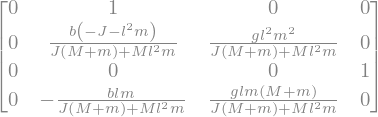

In [6]:
A = sp.Matrix([[0, 1, 0, 0], [0, -(J+m*l**2)*b/(J*(M+m) + M*m*l**2), m**2*g*l**2/(J*(M+m) + M*m*l**2), 0], [0, 0, 0, 1], [0, -m*l*b/(J*(M+m) + M*m*l**2), m*g*l*(M+m)/(J*(M+m) + M*m*l**2), 0]])
A

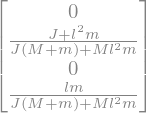

In [7]:
B = sp.Matrix([0, (J+m*l**2)/(J*(M+m) + M*m*l**2), 0, m*l/(J*(M+m) + M*m*l**2)])
B

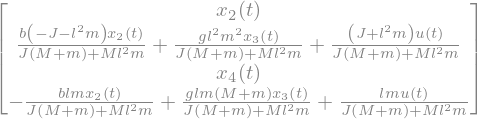

In [8]:
xDot = A*x + B*u
xDot

## Steuerbarkeitsmatrix aufstellen

Beim SymPy-Matrix-Befehl ist zu beachten, die Definition zeilenweise erfolgt:
\begin{equation}
M =
\begin{pmatrix}
a_{11} &a_{12} &a_{13}\\
a_{21} &a_{22} &a_{23}\\
a_{31} &a_{32} &a_{33}
\end{pmatrix}
\end{equation}

==> `M = sp.Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])`

Da die Steuerbarkeitsmatrix jedoch spaltenweise aufgebaut wird, müssen wir hier den Umweg über eine Doppeltransposition gehen.

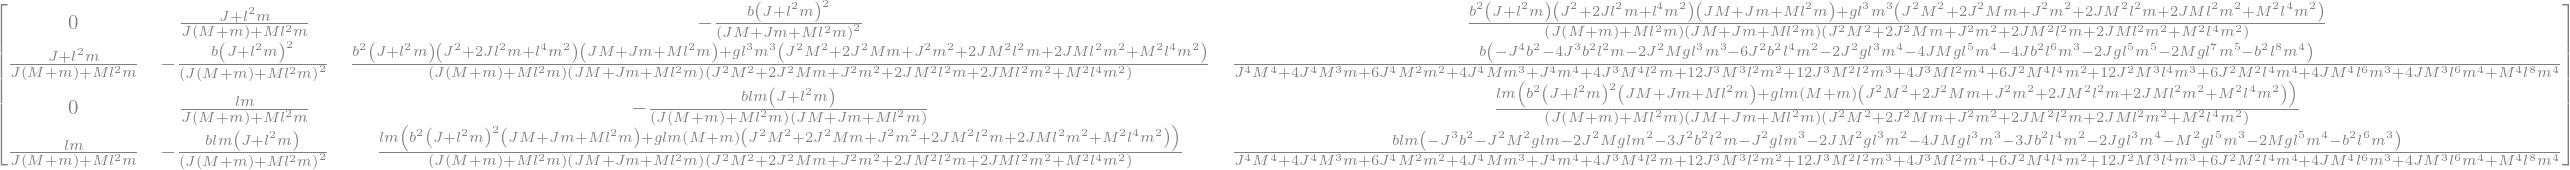

In [9]:
S = sp.simplify(sp.Matrix([B.T, (A*B).T, (A**2*B).T, (A**3*B).T]).T)
S

## Inverse der Steuerbarkeitsmatrix aufstellen

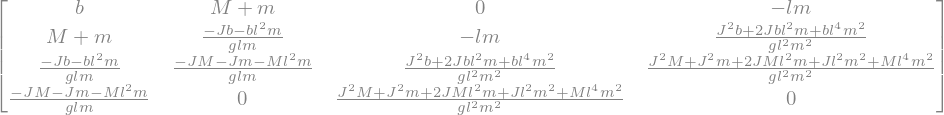

In [10]:
SInv = S.inv()
SInv

## Letzte Zeile der inversen Steuerbarkeitsmatrix extrahieren 

Das erstes Element wird dabei auf 1 normiert (nicht unbedingt nötig)

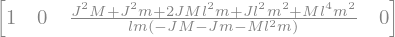

In [11]:
n, d = sp.fraction(SInv[-1, 0])
q = SInv[-1, :]*d/n
q

## Flacher Ausgang und seine Ableitungen

Ergibt sich laut Definition zu $y = q \cdot x$

Tipp: simplify auf expand anwenden hilft manchmal, übersichtlichere Ergebnisse zu finden

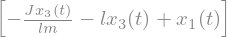

In [12]:
y = sp.simplify(sp.expand(q*x))
y

So sieht es noch ein wenig schöner aus (collect geht nicht auf Matrix-Objekt):

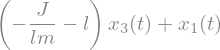

In [13]:
sp.collect(y[0], x3)

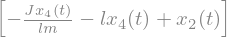

In [14]:
yDot = sp.simplify(sp.diff(y, t).subs([(dx1, xDot[0]), (dx2, xDot[1]), (dx3, xDot[2]), (dx4, xDot[3])]))
yDot

In [15]:
yDDot = sp.simplify(sp.diff(yDot, t).subs([(dx1, xDot[0]), (dx2, xDot[1]), (dx3, xDot[2]), (dx4, xDot[3])]))
yDDot

In [16]:
yDDDot = sp.simplify(sp.diff(yDDot, t).subs([(dx1, xDot[0]), (dx2, xDot[1]), (dx3, xDot[2]), (dx4, xDot[3])]))
yDDDot

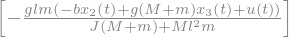

In [17]:
yDDDDot = sp.simplify(sp.diff(yDDDot, t).subs([(dx1, xDot[0]), (dx2, xDot[1]), (dx3, xDot[2]), (dx4, xDot[3])]))
yDDDDot

Eine Matrix $M$ definieren, für die folgendes gilt: 
\begin{equation}
\begin{pmatrix}
y\\ \dot y\\ \ddot y\\ y^{(3)}\\ y^{(4)}
\end{pmatrix}
= M \cdot
\begin{pmatrix}
x_1\\ x_2\\ x_3\\ x_4\\ u
\end{pmatrix}
\end{equation}

Durch den Befehl `y.jacobian(xu)` mit `xu = (x1, x2, x3, x4, u)` wird aus $a x_1 + b x_2 + c x_3 + d x_4 + e u$ der Zeilenvektor $(a, b, c, d, e)$

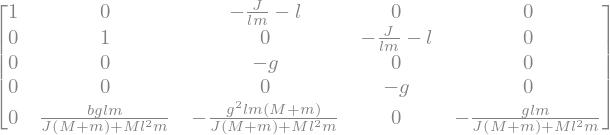

In [18]:
M = sp.Matrix([y.jacobian(xu), yDot.jacobian(xu), yDDot.jacobian(xu), yDDDot.jacobian(xu), yDDDDot.jacobian(xu)])
M

Berechnung der Komponenten des Zustandsvektors $\mathbf{x}$ und des Eingangs $u$ aus dem fl. Ausgang: $x = M^{-1} y$

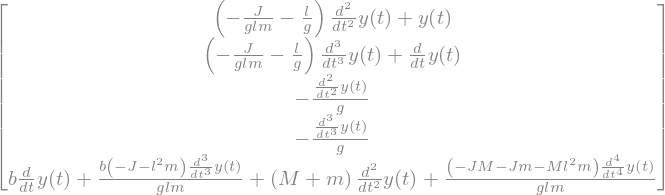

In [19]:
sp.simplify(M.inv())*sp.Matrix([ys, dys, ddys, dddys, ddddys])